In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
from py_vollib.black_scholes.implied_volatility import implied_volatility 
#from py_vollib.black.implied_volatility import implied_volatility as implied_volatility
os.chdir(r'C:\Users\s0837263\Desktop\Neural_SDEs\LV\Bounds\Bounds_59surface\Bounds_Tamed__1000_epochs_PC_321')

# Neural SDEs

## Target model that generates data

$$
dS_t = 0.025 S_t dt + S_t \sqrt{V_t}dW_t, \quad S_0 = 1 \\
dV_t = 0.78262913 (0.11019787 - V_t)dt + 0.6792422 \sqrt{V_t}dB_t, \quad V_0 = 0.04041835 \\
d\langle B_t, W_t \rangle_t = \rho dt, \quad \rho = 0.04355395
$$

## Neural SDE model (fitted using Tamed Euler Scheme)

$$
dS_t = 0.025 S_t dt + S_t\sigma (t, S_t, \theta)dW_t, \quad S_0 = 1 \\
%S_t\leq 100,~ S_t \geq 0.
%dV_t = b^{V}(t,V_t,\phi)dt + S_t\sigma^V(t,V_t,\psi)dB_t,  \quad V_0 = v_0\\
%d\langle B_t, W_t \rangle_t = \rho dt,
$$
One network per maturity. Parameters to be optimized: $\theta, \gamma, \eta-$(CV vanilla and exotic respectibelly) 4 layers and 50 neurons used for $\sigma$, $3$ layers and $30$ neurons for CV for vanilla prices. $3$ layers and $20$ neurons for CV for exotic price. $1000$ Epochs ($500$ for training LV model $500$ for training CV).
Total number of Brownian trajectories per epoch $400$k (used for validation). Each training iteration uses $50$k trajectories.

In [71]:
def get_vanilla_iv(filename):
    checkpoint = torch.load(filename, map_location="cpu")
    format_st = filename.replace(".pth.tar","")
    
    vanilla_pred = checkpoint["pred"].numpy()
    vanilla_target = checkpoint["target_mat_T"].numpy()
    vanilla_target = vanilla_target[0:21]
    K = np.arange(0.8,1.21,0.02)
    iv = np.zeros_like(K)
    iv_target = np.zeros_like(K)
    t = checkpoint["T"]
    for idx, (pred, target, k) in enumerate(zip(vanilla_pred, vanilla_target, K)):
        iv[idx] = implied_volatility(pred,  S=1, K=k, t=t/96, r=0.025, flag="c")
        iv_target[idx] = implied_volatility(target,  S=1, K=k, t=t/96, r=0.025, flag="c")
    
    fig, ax = plt.subplots(1,2)
    ax[0].plot(K, vanilla_pred, label="Neural SDE")
    ax[0].plot(K, vanilla_target, label="Market Data")
    ax[0].legend()
    ax[0].set_ylabel("Call Price")
    ax[0].set_xlabel("K")
    ax[0].set_title("Call Price, "+"T={} Months".format(t//8))
    ax[1].plot(K, np.abs(vanilla_pred-vanilla_target)*10000)
    ax[1].ticklabel_format(axis="y", style="sci")
    ax[1].set_ylabel("Error (bps)")
    ax[1].set_ylim([0,3])
    ax[1].set_title("Call Price Error")
   # fig.suptitle("Maturity T={} Months".format(t//8))
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(format_st+'_vanilla.eps', format='eps')
    print(format_st+"_vanilla.pdf")
    
    
    fig, ax = plt.subplots(1,2)
    ax[0].plot(K, iv, label="Neural SDE")
    ax[0].plot(K, iv_target, label="Market Data")
    ax[0].legend()
    ax[0].set_ylabel("Implied Vol.")
    ax[0].set_xlabel("K")
    ax[0].set_title("Implied Vol., "+"T={} Months".format(t//8))
    ax[1].plot(K, np.abs(iv-iv_target)*10000)
    ax[1].ticklabel_format(axis="y", style="sci")
    ax[1].set_ylim([0,25])
    ax[1].set_ylabel("Error (bps)")
    ax[1].set_title("Implied Vol. Error")
   # fig.suptitle("Maturity T={} Months".format(t//8))
    #fig.suptitle("Vanilla Prices fit")
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(format_st+'_iv.eps', format='eps')
    print(format_st+"_iv.pdf")
    

# Neural SDE fit to vanilla price without bounds

In [72]:
files = glob.glob("Neural_SDE_maturity*tar")
files = [f for f in files if "GAN" not in f]

In [73]:
files

['Neural_SDE_maturity16.pth.tar',
 'Neural_SDE_maturity32.pth.tar',
 'Neural_SDE_maturity48.pth.tar',
 'Neural_SDE_maturity64.pth.tar',
 'Neural_SDE_maturity80.pth.tar',
 'Neural_SDE_maturity96.pth.tar']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity16_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity16_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity32_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity32_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity48_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity48_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity64_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity64_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity80_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity80_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity96_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_maturity96_iv.pdf


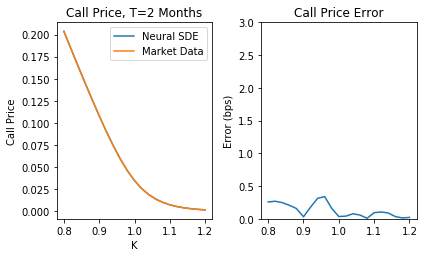

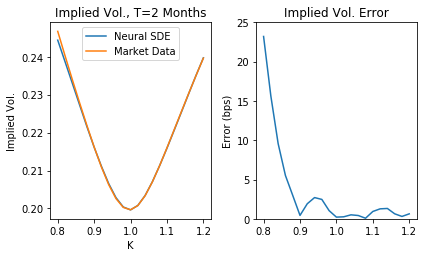

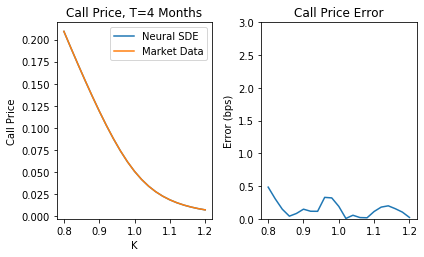

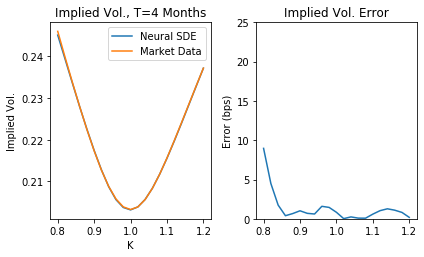

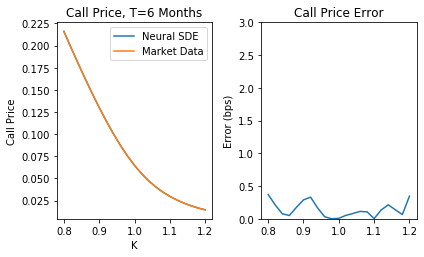

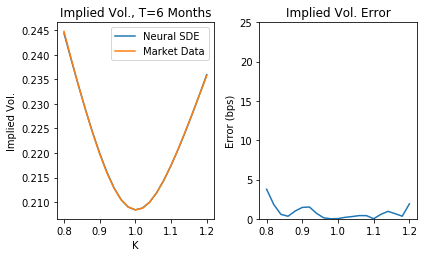

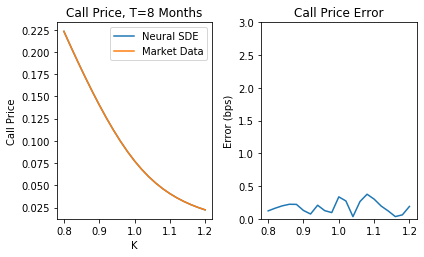

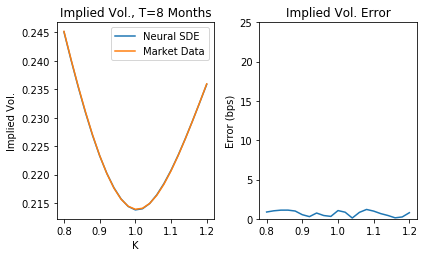

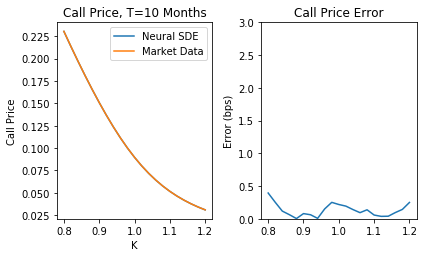

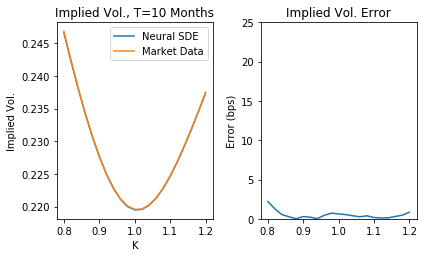

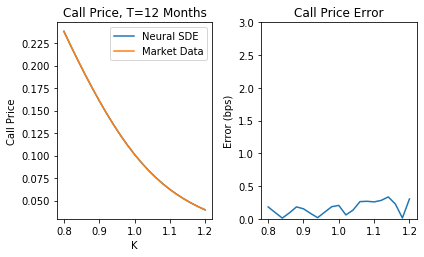

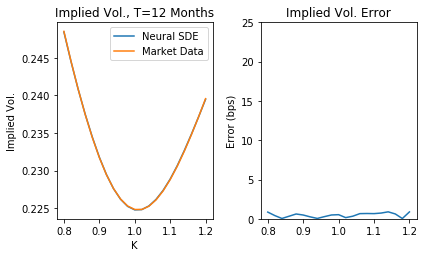

In [74]:
for filename in files:
    get_vanilla_iv(filename)


# Neural SDE fit to vanilla price with Lower bound on lookback

In [63]:
files = glob.glob("*lowerbound*tar")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity16_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity16_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity32_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity32_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity48_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity48_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity64_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity64_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity80_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity80_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity96_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_lowerbound_maturity96_iv.pdf


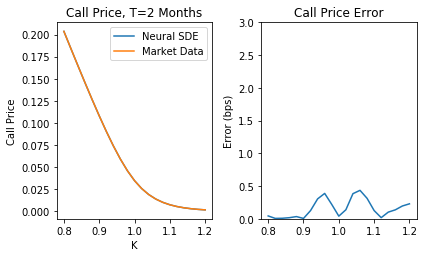

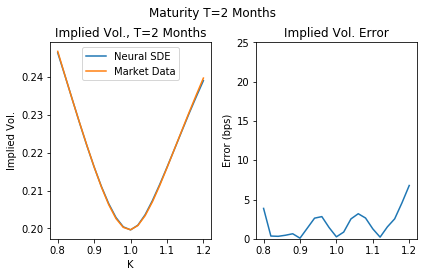

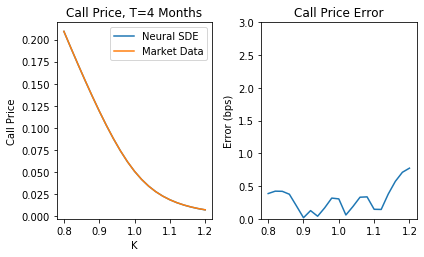

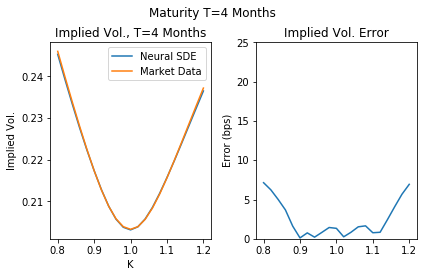

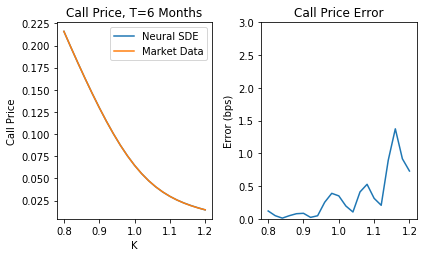

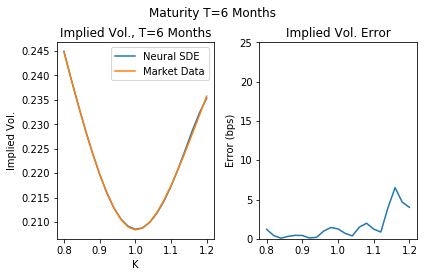

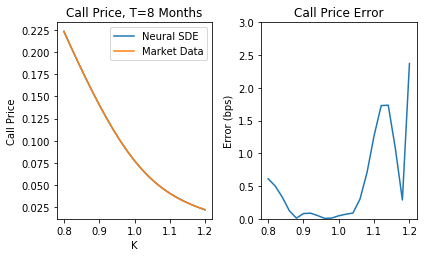

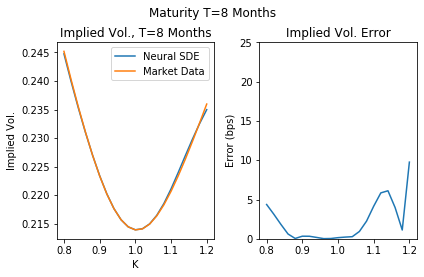

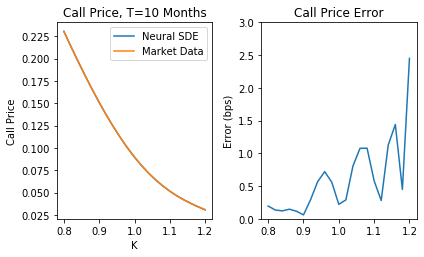

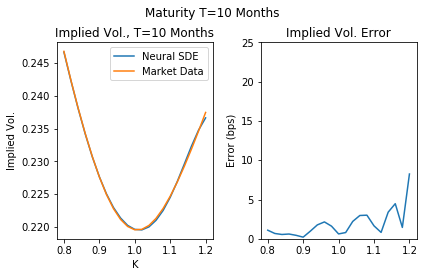

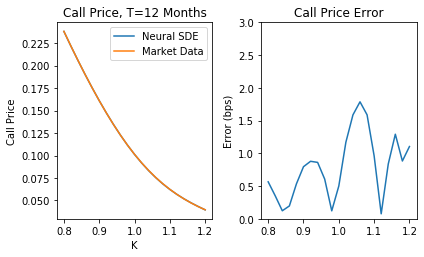

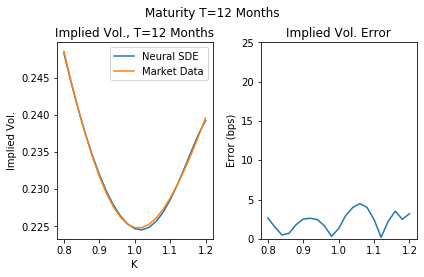

In [64]:
for filename in files:
    get_vanilla_iv(filename)

# Neural SDE fit to vanilla price with upper bound on lookback price 

In [65]:
files = glob.glob("*upperbound*tar")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity16_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity16_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity32_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity32_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity48_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity48_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity64_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity64_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity80_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity80_iv.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity96_vanilla.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Neural_SDE_upperbound_maturity96_iv.pdf


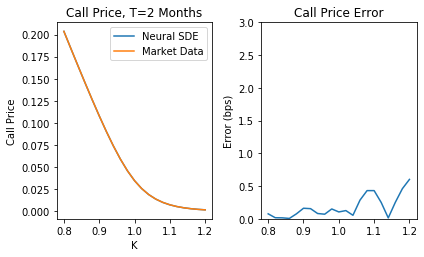

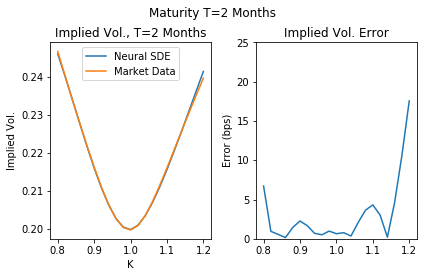

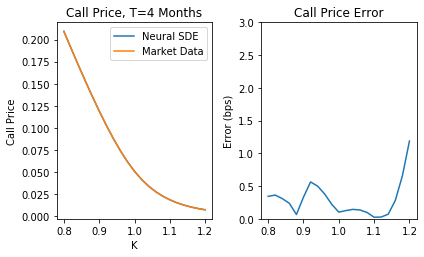

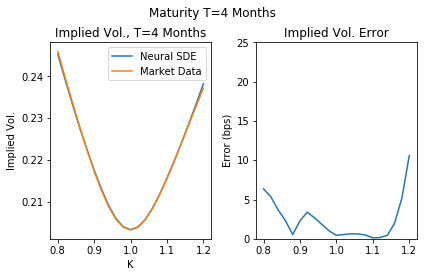

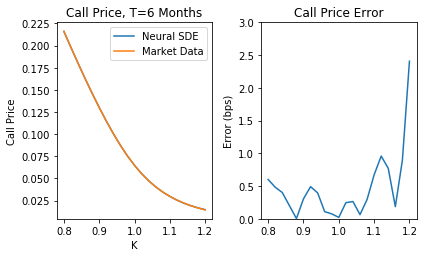

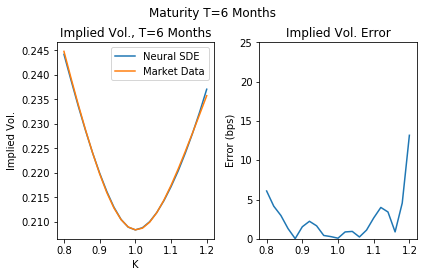

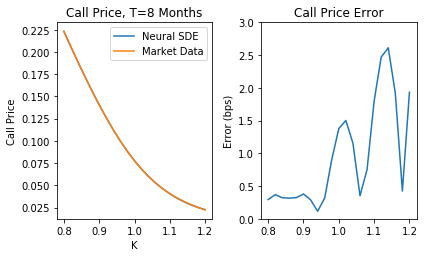

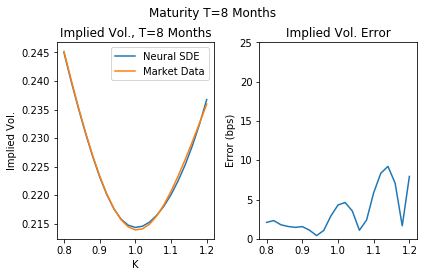

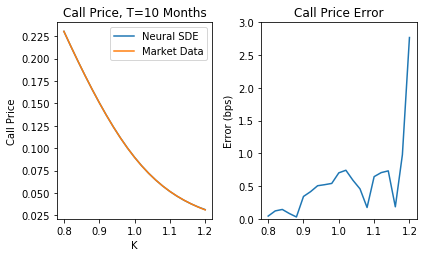

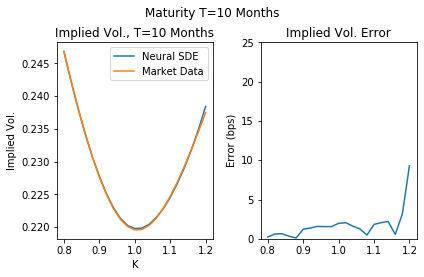

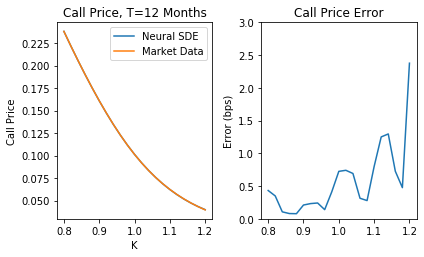

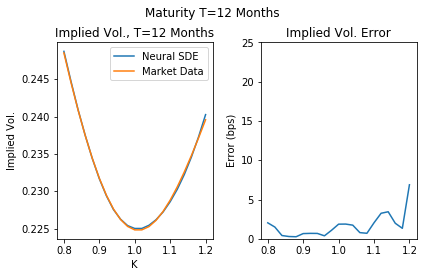

In [66]:
for filename in files:
    get_vanilla_iv(filename)

# Upper bound and lower bound for lookback options

$\lambda = 2000$

In [31]:
print('2 month maturity:')
filename = 'Neural_SDE_maturity16.pth.tar'
checkpoint = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_lowerbound_maturity16.pth.tar'
checkpoint_LB = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_upperbound_maturity16.pth.tar'
checkpoint_UB = torch.load(filename, map_location="cpu")


print("Lower bound", checkpoint_LB['exotic_price_mean'].item())
print("Upper bound", checkpoint_UB['exotic_price_mean'].item())
print("Without Lagrangian mult", checkpoint['exotic_price_mean'].item())

print('4 month maturity:')
filename = 'Neural_SDE_maturity32.pth.tar'
checkpoint = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_lowerbound_maturity32.pth.tar'
checkpoint_LB = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_upperbound_maturity32.pth.tar'
checkpoint_UB = torch.load(filename, map_location="cpu")

print("Lower bound", checkpoint_LB['exotic_price_mean'].item())
print("Upper bound", checkpoint_UB['exotic_price_mean'].item())
print("Without Lagrangian mult", checkpoint['exotic_price_mean'].item())

print('6 month maturity:')
filename = 'Neural_SDE_maturity48.pth.tar'
checkpoint = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_lowerbound_maturity48.pth.tar'
checkpoint_LB = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_upperbound_maturity48.pth.tar'
checkpoint_UB = torch.load(filename, map_location="cpu")


print("Lower bound", checkpoint_LB['exotic_price_mean'].item())
print("Upper bound", checkpoint_UB['exotic_price_mean'].item())
print("Without Lagrangian mult", checkpoint['exotic_price_mean'].item())

print('8 month maturity:')
filename = 'Neural_SDE_maturity64.pth.tar'
checkpoint = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_lowerbound_maturity64.pth.tar'
checkpoint_LB = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_upperbound_maturity64.pth.tar'
checkpoint_UB = torch.load(filename, map_location="cpu")


print("Lower bound", checkpoint_LB['exotic_price_mean'].item())
print("Upper bound", checkpoint_UB['exotic_price_mean'].item())
print("Without Lagrangian mult", checkpoint['exotic_price_mean'].item())

print('10 month maturity:')
filename = 'Neural_SDE_maturity80.pth.tar'
checkpoint = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_lowerbound_maturity80.pth.tar'
checkpoint_LB = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_upperbound_maturity80.pth.tar'
checkpoint_UB = torch.load(filename, map_location="cpu")

print("Lower bound", checkpoint_LB['exotic_price_mean'].item())
print("Upper bound", checkpoint_UB['exotic_price_mean'].item())
print("Without Lagrangian mult", checkpoint['exotic_price_mean'].item())

print('12 month maturity:')
filename = 'Neural_SDE_maturity96.pth.tar'
checkpoint = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_lowerbound_maturity96.pth.tar'
checkpoint_LB = torch.load(filename, map_location="cpu")
filename = 'Neural_SDE_upperbound_maturity96.pth.tar'
checkpoint_UB = torch.load(filename, map_location="cpu")


print("Lower bound", checkpoint_LB['exotic_price_mean'].item())
print("Upper bound", checkpoint_UB['exotic_price_mean'].item())
print("Without Lagrangian mult", checkpoint['exotic_price_mean'].item())



2 month maturity:
Lower bound 0.05558053031563759
Upper bound 0.05597571283578873
Without Lagrangian mult 0.05619991943240166
4 month maturity:
Lower bound 0.08690420538187027
Upper bound 0.08813901990652084
Without Lagrangian mult 0.08746003359556198
6 month maturity:
Lower bound 0.10439720749855042
Upper bound 0.11956669390201569
Without Lagrangian mult 0.11436905711889267
8 month maturity:
Lower bound 0.13108907639980316
Upper bound 0.1561422348022461
Without Lagrangian mult 0.1363307684659958
10 month maturity:
Lower bound 0.13929186761379242
Upper bound 0.17925557494163513
Without Lagrangian mult 0.16050803661346436
12 month maturity:
Lower bound 0.15343013405799866
Upper bound 0.2048565149307251
Without Lagrangian mult 0.1798800677061081


In [7]:
loss_upper=np.genfromtxt("loss_upper_bound.txt", unpack=True)
loss_lower=np.genfromtxt("loss_lower_bound.txt", unpack=True)
loss_no_bound=np.genfromtxt("loss_no_bound.txt", unpack=True)

In [10]:
print(loss_upper)
print(loss_lower)
print(loss_no_bound)

[0.05082892 0.05052499 0.04627007 ... 0.00017856 0.00021637 0.00021198]
[0.06360681 0.06421592 0.05910894 ... 0.00016533 0.00022753 0.00023863]
[5.75108118e-02 5.75085133e-02 4.42406833e-02 ... 1.35201422e-04
 1.34746981e-04 1.90547489e-05]


In [11]:
print(np.min(loss_upper))

2.1333482436602935e-05


In [12]:
print(np.min(loss_lower))

1.798567973310128e-05


In [13]:
print(np.min(loss_no_bound))

1.6398245861637406e-05
